In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
def step(massLoss, c):
    tau = c[5]*massLoss
    gamma = 10**(c[3]*np.tanh(np.log10(tau)/c[4]))
    surfaceTemp = c[2]*(1 + 1/gamma + (1-1/gamma)*np.exp(-gamma*tau))**(1/4)
    massLoss = c[0]*np.exp(-c[1]/(c[2]*(1 + 1/gamma + (1-1/gamma)*np.exp(-gamma*tau))**(1/4)))
    #newTau = c[0]*np.exp(-c[1]/((2/3 + 1/gamma + (gamma/3 - 1/gamma)*np.exp(-gamma*tau)))**(1/4))
    return massLoss, surfaceTemp, tau

In [8]:
massLossArr = [0]
surfaceTempArr = [0]
opDepthArr = [0]
c4a = 1
for i in range(500):
    data = step(massLossArr[i], [np.exp(38*2**(-0.25)),38,1,c4a,1,1])
    massLossArr.append(data[0])
    surfaceTempArr.append(data[1])
    opDepthArr.append(data[2])

/tmp/ipykernel_53/301701457.py:3: RuntimeWarning: divide by zero encountered in log10
  gamma = 10**(c[3]*np.tanh(np.log10(tau)/c[4]))


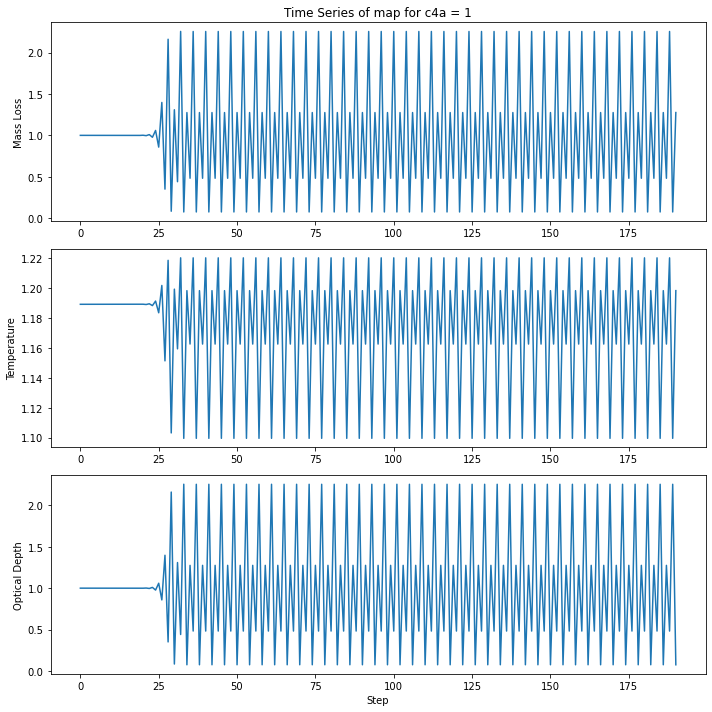

In [4]:
fig, axs = plt.subplots(3,1, figsize = (10,10))
axs[0].plot(massLossArr[10:])
axs[1].plot(surfaceTempArr[10:])
axs[2].plot(opDepthArr[10:])
axs[0].set_ylabel("Mass Loss")
axs[1].set_ylabel("Temperature")
axs[2].set_ylabel("Optical Depth")
axs[2].set_xlabel("Step")
axs[0].set_title("Time Series of map for c4a = "+str(c4a))
plt.tight_layout()
plt.savefig("./timeseries"+str(10*c4a)+".png")
plt.show()

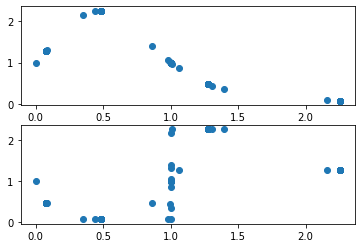

In [5]:
fig3, axs3 = plt.subplots(2,1)
axs3[0].scatter(massLossArr[:-1], massLossArr[1:])
axs3[1].scatter(massLossArr[:-10], massLossArr[10:])

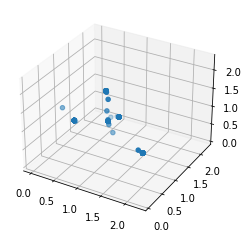

In [6]:
fig4 = plt.figure()
ax4 = fig4.add_subplot(projection = '3d')
ax4.scatter(massLossArr[:-2],massLossArr[1:-1],massLossArr[2:])

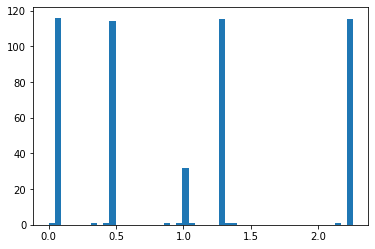

In [9]:
fig1 = plt.subplot()
x = 1.5*np.ones(len(massLossArr))
fig1.hist(massLossArr, 50)
plt.show()

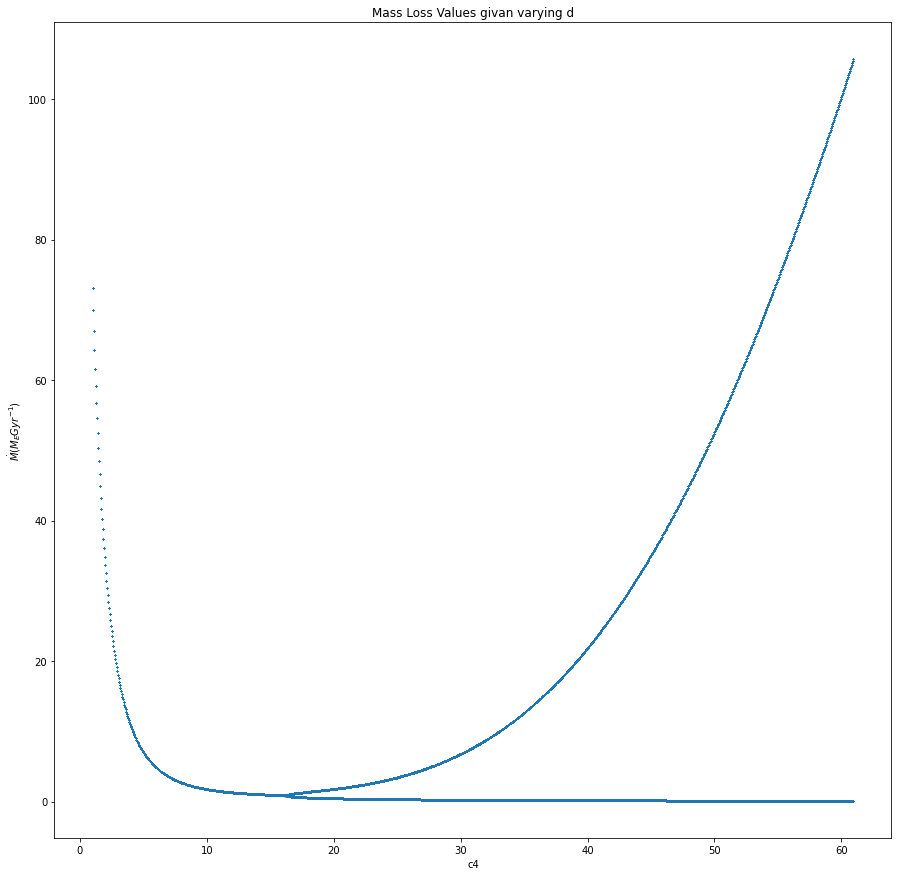

In [30]:
massLossData = [[]]
surfaceTempData = [[]]
opacityData = [[]]

for i in range(1200):
    massLossArr = [0]
    surfaceTempArr = [0]
    opacityArr = [0]

    for j in range(1010):
        data = step(massLossArr[j], 1+0.01*i)
        massLossArr.append(data[0])
        surfaceTempArr.append(data[1])
        opacityArr.append(data[2])
    massLossData.append(massLossArr[10:])
    surfaceTempData.append(surfaceTempArr[10:])
    opacityData.append(opacityArr[10:])

fig1, ax = plt.subplots(figsize = (15,15))
for i in range(len(massLossData)):
    x = (1+0.05*(i-1))*np.ones(len(massLossData[i]))
    ax.scatter(x,massLossData[i], s = 5, c = "tab:blue", alpha = 0.005, marker = '.')

#xticks = np.arange(1,2.2,0.05)
#ax.set_xticks(xticks)
ax.set_xlabel("c4")
ax.set_ylabel("$\dot{M} (M_E Gyr^{-1})$")
ax.set_title("Mass Loss Values givan varying d")
#plt.savefig("./bifurcationDiagram.png")
plt.show()    
    

25


In [3]:
def simpleMap(massLoss,c1,c2):
    newMassLoss = c1*np.exp(-c2/(np.exp(-(massLoss)/4)))
    return newMassLoss

In [6]:
massLossArr = [0]
c1 = 4.7e14
c2 = 71200/2100

for i in range(100):
    massLossArr.append(simpleMap(massLossArr[i],c1,c2))
    

    

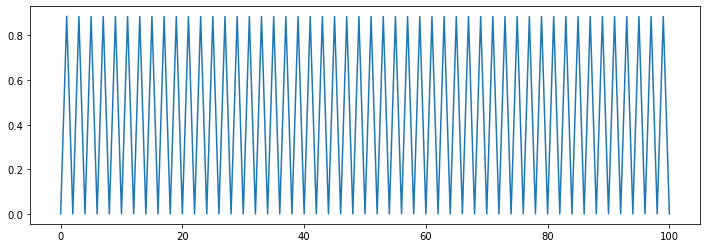

In [7]:
fig, ax = plt.subplots(figsize = (12,4))
ax.plot(massLossArr)
plt.show()

/tmp/ipykernel_1139/202627190.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  newMassLoss = c1*np.exp(-c2/(np.exp(-(massLoss)/4)))
/tmp/ipykernel_1139/202627190.py:2: RuntimeWarning: overflow encountered in double_scalars
  newMassLoss = c1*np.exp(-c2/(np.exp(-(massLoss)/4)))


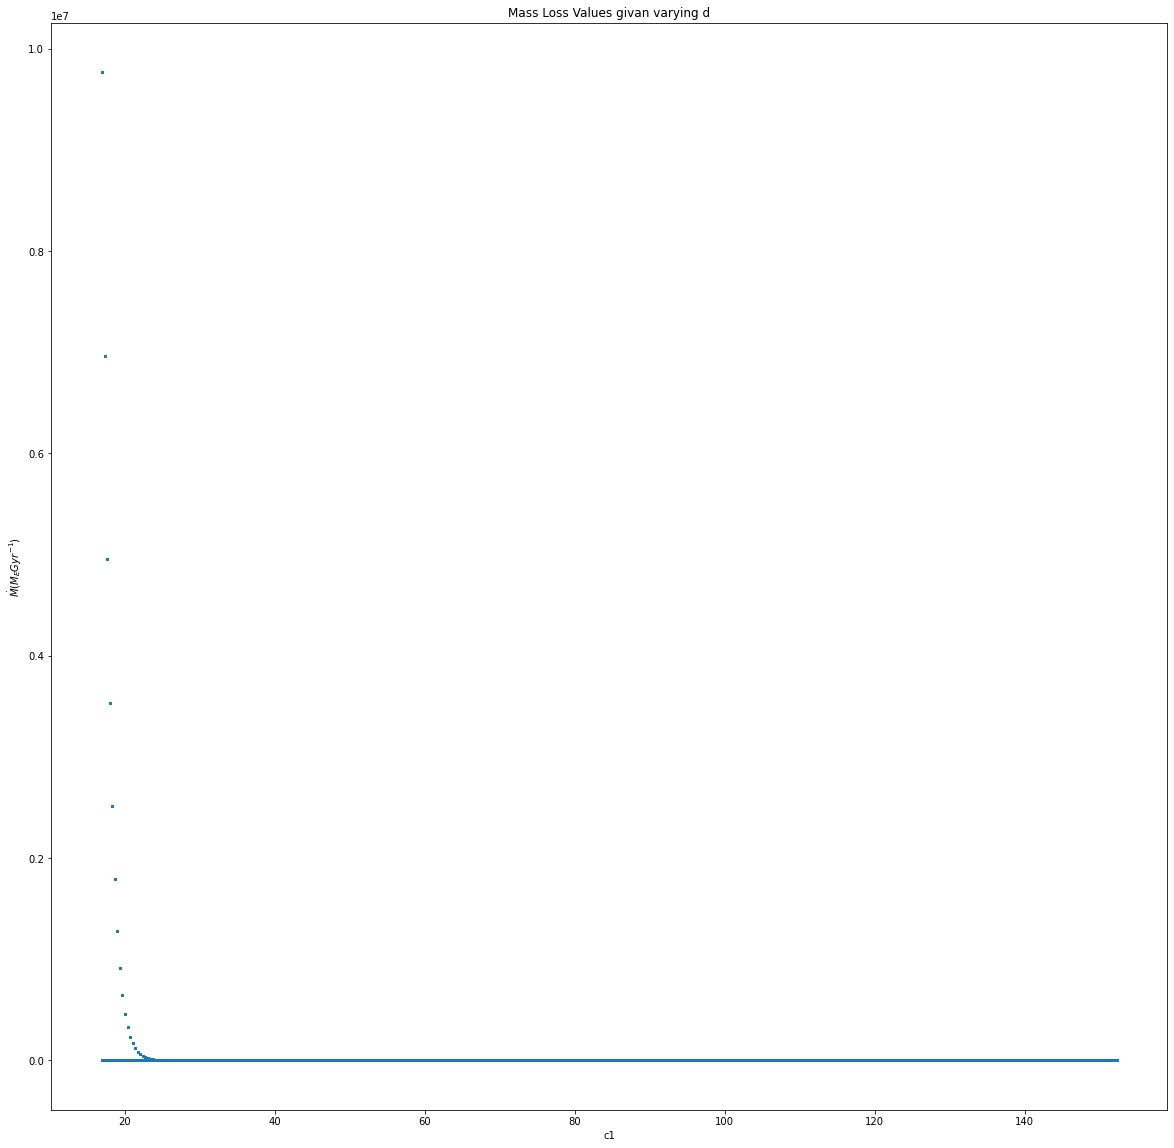

In [13]:
massLossData = [[]]

c1 = 2.25e14
c20 = 71200/2100
for i in range(400):
    massLossArr = [0]
    surfaceTempArr = [0]
    opacityArr = [0]

    for j in range(800):
        c2 = (0.5+0.01*i)*c20
        massLossArr.append(simpleMap(massLossArr[j],c1,c2))
    massLossData.append(massLossArr[50:])

fig1, ax = plt.subplots(figsize = (20,20))
for i in range(len(massLossData)):
    x = (0.5+0.01*(i-1))*np.ones(len(massLossData[i]))*(c20)
    ax.scatter(x,massLossData[i], s = 5, c = "tab:blue", alpha = 0.1, marker = '.')
ax.set_xlabel("c1")
ax.set_ylabel("$\dot{M} (M_E Gyr^{-1})$")
ax.set_title("Mass Loss Values givan varying d")
#plt.savefig("./bifurcationDiagram2.png")
plt.show()    
    